# Import

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import sklearn

from collections import Counter

# Load data

In [2]:
def load(f):
    data = []
    with open(f, encoding="latin-1") as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            data.append((row['SentimentText'], int(row['Sentiment'])))
    return data

In [3]:
train = load('data/train.csv')

In [4]:
labels = {
    0: "negative",
    1: "positive",
}

In [5]:
train[:20]

[('                     is so sad for my APL friend.............', 0),
 ('                   I missed the New Moon trailer...', 0),
 ('              omg its already 7:30 :O', 1),
 ("          .. Omgaga. Im sooo  im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)...",
  0),
 ('         i think mi bf is cheating on me!!!       T_T', 0),
 ('         or i just worry too much?        ', 0),
 ('       Juuuuuuuuuuuuuuuuussssst Chillin!!', 1),
 ('       Sunny Again        Work Tomorrow  :-|       TV Tonight', 0),
 ('      handed in my uniform today . i miss you already', 1),
 ('      hmmmm.... i wonder how she my number @-)', 1),
 ('      I must think about positive..', 0),
 ('      thanks to all the haters up in my face all day! 112-102', 1),
 ('      this weekend has sucked so far', 0),
 ('     jb isnt showing in australia any more!', 0),
 ('     ok thats it you win.', 0),
 ('    &lt;-------- This is the way i feel right now...', 0),
 ("    aw

# Analyze

In [6]:
len(train)

99989

Counter({1: 56457, 0: 43532})


(-1.1050889365975138,
 1.1002423303141673,
 -1.1111496620442514,
 1.1276313226463996)

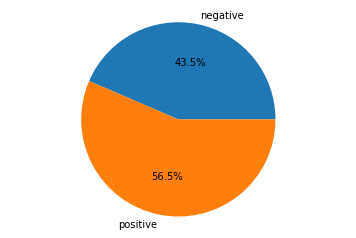

In [7]:
label_cnt = Counter([i[1] for i in train])
print(label_cnt)
plt.pie(label_cnt.values(), labels=labels.values(), autopct='%1.1f%%')
plt.axis('equal')

# Train / test split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x = [i[0] for i in train]
y = [i[1] for i in train]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Text vectorization

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
vectorizer = CountVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)

In [12]:
x_train_vec

<79991x90893 sparse matrix of type '<class 'numpy.int64'>'
	with 952953 stored elements in Compressed Sparse Row format>

# Train model

In [13]:
from sklearn.naive_bayes import MultinomialNB

In [14]:
model = MultinomialNB()
model.fit(x_train_vec, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Test model

In [15]:
def test_it(i):
    print(x_test[i])
    print(labels[model.predict(vectorizer.transform([x_test[i]]))[0]])

In [16]:
for i in range(10):
    test_it(i)
    print()

@Allieandra wheeee! 
negative

@a02toyota Thank you for the FF! Good to meet ya 
positive

@ electricbath Eewwww. Gross! So sorry hayward hates you like that. 
negative

#followfriday - I'm a little late, but here's a special shoutout for @SomersetMarcy - my missus! 
positive

#icanhelp in shopping (deals), personal assistant, event planning!! I own GET IT TOGETHER, those are my services  jennifer.git@gmail.com
positive

 broken hearts will heal with time...
negative

..I've already listened to all the S4 commentary except the finale 
negative

&quot;Everybody make mistakes.&quot; I'm gonna go get some sleep because I have an other show tomorrow night and I want it to be peeeeerfect! 
negative

#I Believe...that if you smile at someone, friend or stranger, you will make TWO people feel good.  
positive

@andreacFOD I think I'm done at twitterland too. I will tweet David one last time tomorrow. This made me sad. 
negative



# Evaluate model

In [17]:
from sklearn.metrics import classification_report

In [18]:
y_pred = model.predict(vectorizer.transform(x_test))
print(classification_report(y_test, y_pred, target_names=labels.values()))

             precision    recall  f1-score   support

   negative       0.73      0.72      0.72      8750
   positive       0.78      0.80      0.79     11248

avg / total       0.76      0.76      0.76     19998

